## LINEAR REGRESSION

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a column matrix X values

X = torch.linspace(1,50,50).reshape(-1,1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [5]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [6]:
# Create the column matrix for y values
y = 2*X + 1 + e
print(y)

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])


Text(0, 0.5, 'y')

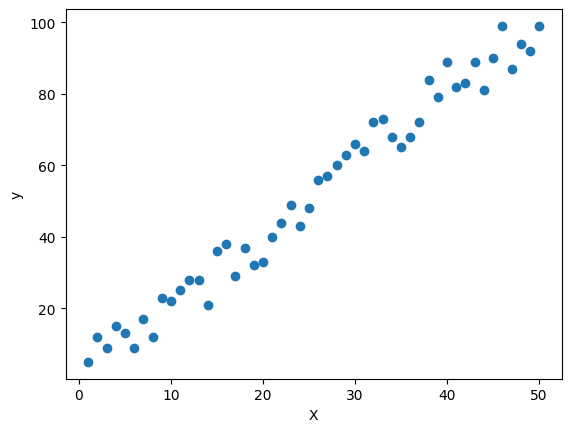

In [7]:
plt.scatter(X.numpy(), y.numpy())
plt.xlabel("X")
plt.ylabel("y")

In [8]:
# Simple Linear Regression Model

torch.manual_seed(71)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.0145]], requires_grad=True)
Parameter containing:
tensor([-0.3306], requires_grad=True)


In [9]:
# Define the simple linear regression class

class Model(nn.Module):
    def __init__(self, in_features = 1, out_features = 1):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x) 
        return y_pred

In [14]:
torch.manual_seed(59)
x = torch.tensor([2.0])
model = Model(1,1)

y_pred = model.forward(x)
print(y_pred)
print(model.linear.weight)
print(model.linear.bias)
print("\n")
print("Weight: ",model.linear.weight.item())
print("Bias: ", model.linear.bias.item()) 

tensor([1.1758], grad_fn=<ViewBackward0>)
Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


Weight:  0.10597813129425049
Bias:  0.9637961387634277


In [15]:
# get those params from the model

for name, param in model.named_parameters():
    print(name, '\t',param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [16]:
# PLOT our first model which hasn't been trained on our dataset

x1 = np.array([X.min(), X.max()])
print(x1)

[ 1. 50.]


In [17]:
# Using the model for this x1

weight, bias = model.linear.weight.item(), model.linear.bias.item()
y1 = weight*x1 + bias
print(y1)

[1.0697743 6.2627025]


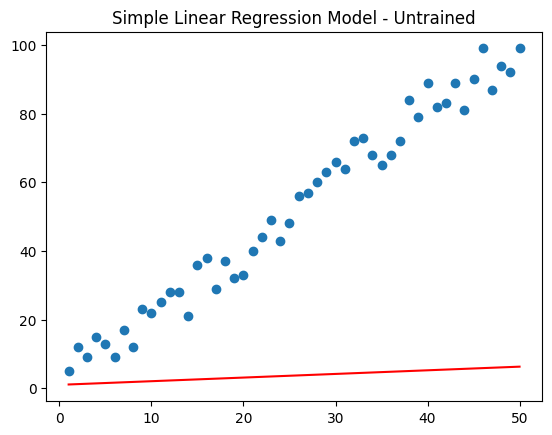

In [20]:
# Plot it out
plt.title("Simple Linear Regression Model - Untrained")
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')

In [ ]:
# Okay, we set the loss function to see how far off we are from our predictions
# Really important for training because we have to reset all of them first.
# Then we do backpropagation and then we do an optimizer step to update the weights and biases
import torch.optim as optim

torch.manual_seed(42) # This one
model = Model(1,1) # This one

LEARNING_RATE = 1e-3
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE) # This one

EPOCHS = 20

losses = []

for epoch in range(EPOCHS):
    model.train()
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch+1} \t Loss: {loss.item():.4f}")

Epoch: 1 	 Loss: 1311.5671
Epoch: 2 	 Loss: 687.3706
Epoch: 3 	 Loss: 365.1199
Epoch: 4 	 Loss: 198.7533
Epoch: 5 	 Loss: 112.8637
Epoch: 6 	 Loss: 68.5218
Epoch: 7 	 Loss: 45.6293
Epoch: 8 	 Loss: 33.8104
Epoch: 9 	 Loss: 27.7084
Epoch: 10 	 Loss: 24.5579
Epoch: 11 	 Loss: 22.9310
Epoch: 12 	 Loss: 22.0908
Epoch: 13 	 Loss: 21.6568
Epoch: 14 	 Loss: 21.4324
Epoch: 15 	 Loss: 21.3162
Epoch: 16 	 Loss: 21.2559
Epoch: 17 	 Loss: 21.2245
Epoch: 18 	 Loss: 21.2080
Epoch: 19 	 Loss: 21.1991
Epoch: 20 	 Loss: 21.1943


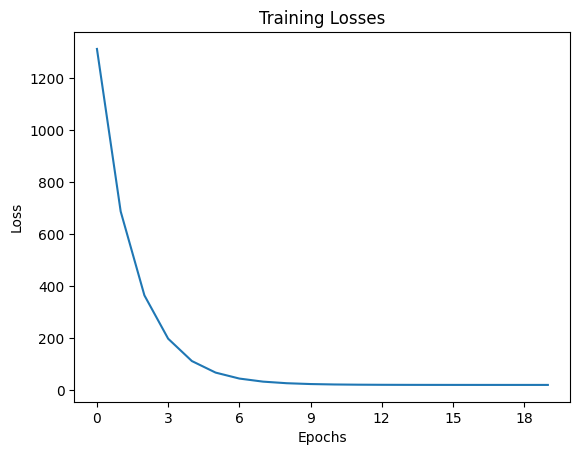

In [29]:
plt.title("Training Losses")
plt.plot(range(EPOCHS), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

import matplotlib.ticker as ticker

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

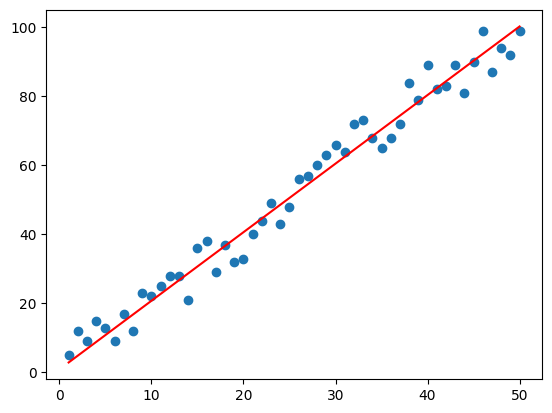

In [30]:
# Plot the prediction results

model.eval()
with torch.no_grad():
    predicted = model.forward(X)
    plt.scatter(X.numpy(), y.numpy(), label='Original data')
    plt.plot(X.numpy(), predicted.numpy(), 'r', label='Fitted line')
    plt.show()

## ANN Basic

In [21]:
# Standard imports

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))
        return x

In [3]:
# Init model and default params
torch.manual_seed(32)
model = Model()

In [5]:
df = pd.read_csv("../datasets/iris.csv", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
X = df.drop(columns=4).to_numpy()
labels = {}
i = 0
for key in df[4].unique():
    labels[key] = i
    i+=1
print(labels)
y = df[4].map(labels).to_numpy()
print(len(X))
print(np.unique(y))

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
150
[0 1 2]


In [62]:
# Train Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trainset = TensorDataset(torch.FloatTensor(X_train), torch.LongTensor(y_train))
testset = TensorDataset(torch.FloatTensor(X_test), torch.LongTensor(y_test))

In [69]:
for item in testset:
    print(item)

(tensor([6.1000, 2.8000, 4.7000, 1.2000]), tensor(1))
(tensor([5.7000, 3.8000, 1.7000, 0.3000]), tensor(0))
(tensor([7.7000, 2.6000, 6.9000, 2.3000]), tensor(2))
(tensor([6.0000, 2.9000, 4.5000, 1.5000]), tensor(1))
(tensor([6.8000, 2.8000, 4.8000, 1.4000]), tensor(1))
(tensor([5.4000, 3.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.6000, 2.9000, 3.6000, 1.3000]), tensor(1))
(tensor([6.9000, 3.1000, 5.1000, 2.3000]), tensor(2))
(tensor([6.2000, 2.2000, 4.5000, 1.5000]), tensor(1))
(tensor([5.8000, 2.7000, 3.9000, 1.2000]), tensor(1))
(tensor([6.5000, 3.2000, 5.1000, 2.0000]), tensor(2))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([5.5000, 3.5000, 1.3000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.1000, 3.8000, 1.5000, 0.3000]), tensor(0))
(tensor([6.3000, 3.3000, 4.7000, 1.6000]), tensor(1))
(tensor([6.5000, 3.0000, 5.8000, 2.2000]), tensor(2))
(tensor([5.6000, 2.5000, 3.9000, 1.1000]), tensor(1))
(tensor([5.7000, 2.8000, 4.5

In [63]:
BATCH_SIZE = 4

train_loader = DataLoader(trainset,batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

In [64]:
torch.manual_seed(4)
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [65]:
epochs = 101
losses = []

for i in range(epochs):
    for x_batch, y_batch in train_loader:
        y_pred = model.forward(x_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if i%10==0:
        print(f"epoch {i} | loss = {loss}")


epoch 0 | loss = 1.0941970348358154
epoch 10 | loss = 0.9051921963691711
epoch 20 | loss = 0.3042128384113312
epoch 30 | loss = 0.35991162061691284
epoch 40 | loss = 0.20414504408836365
epoch 50 | loss = 0.0761893093585968
epoch 60 | loss = 0.056685056537389755
epoch 70 | loss = 0.020775776356458664
epoch 80 | loss = 0.19617322087287903
epoch 90 | loss = 0.019971076399087906
epoch 100 | loss = 0.005700868554413319


In [66]:
len(losses)

101

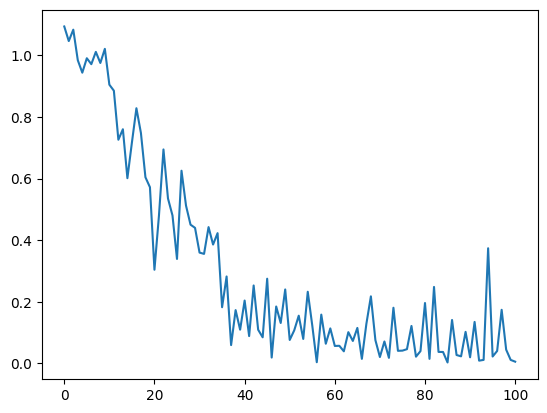

In [67]:
# Plot the function
plt.plot(range(epochs), losses)

In [82]:
# Validate the model
losses = []
all_preds = []
all_labels = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        y_pred = model.forward(x_batch)
        loss = criterion(y_pred, y_batch)
        losses.append(loss.item())
        all_preds.append(y_pred.argmax(dim=1))
        all_labels.append(y_batch)

all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

In [81]:
len(testset)

30

In [83]:
print(sum(losses)/len(losses))

0.07673965088906698


In [86]:
correct = 0
for i in range(len(all_labels)):
    if int(all_labels[i]) == int(all_preds[i]):
        correct+=1


print(f"{correct/len(all_labels)*100}%")

96.66666666666667%
